# Computational Social Science Project #3 

**Nalina Sofia Theagarajan**

*Fall 2024* 

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# settings
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("C:/Users/Nalina Sofia/Downloads/Computational-Social-Science-Training-Program-main/Computational-Social-Science-Training-Program-main/Projects/Project 3/data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("C:/Users/Nalina Sofia/Downloads/Computational-Social-Science-Training-Program-main/Computational-Social-Science-Training-Program-main/Projects/Project 3/data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

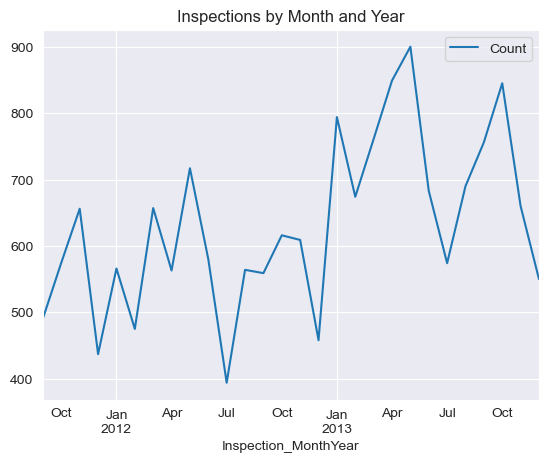

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

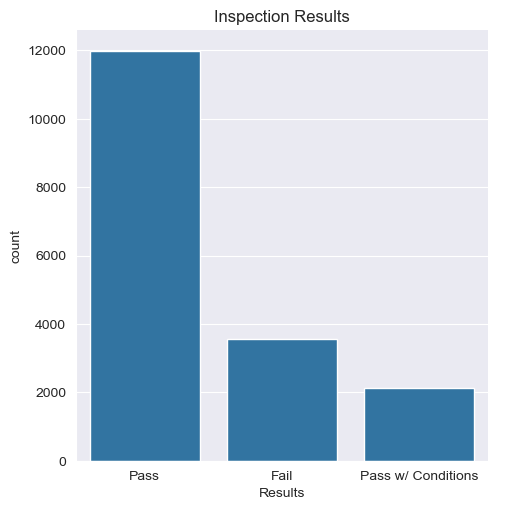

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

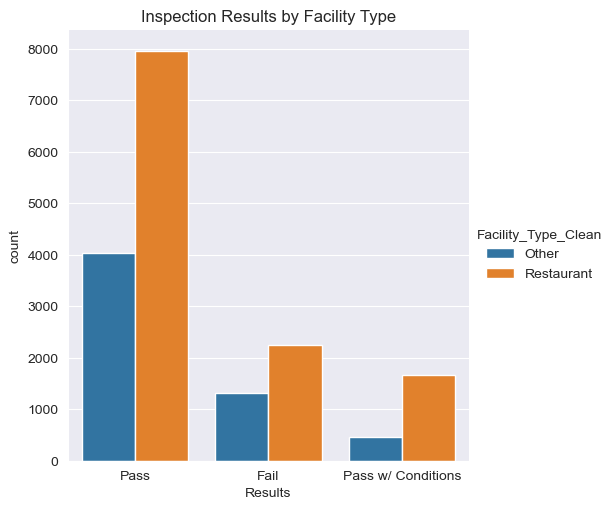

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1

In [13]:
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y_train)


In [14]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

In [15]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

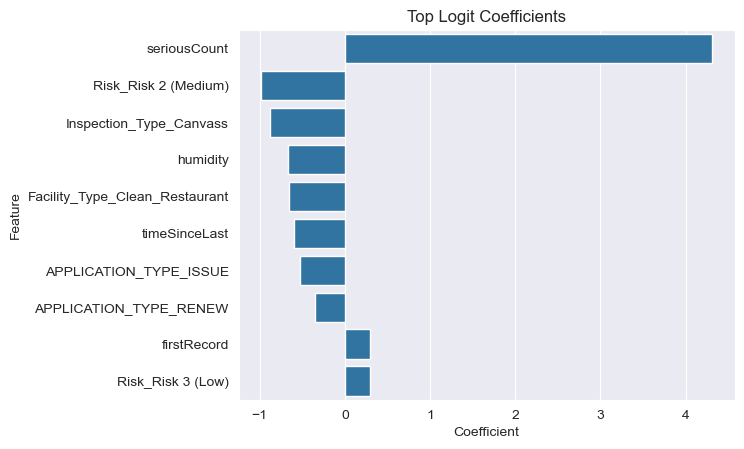

In [16]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

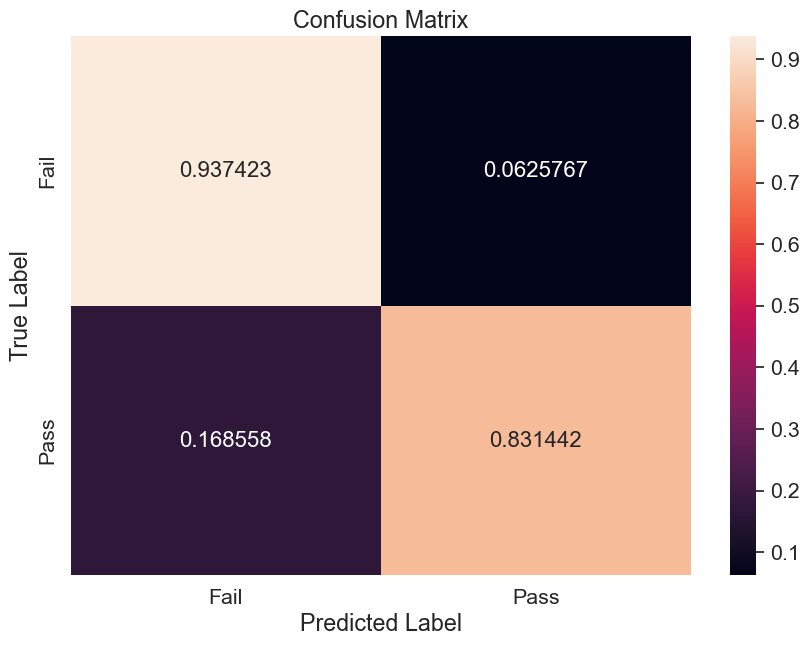

In [17]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Fail", 1: "Pass"})
df_cm.index = ["Fail", "Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9150881776616591


###  Model 2

In [19]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

%matplotlib inline
#sns.set_style("darkgrid")

In [20]:
# Initialize a Decision Tree Classifier
# ----------
dt_classifier = tree.DecisionTreeClassifier(
                       criterion='gini',              # or 'entropy' for information gain
                       splitter='best',               # or 'random' for random best split
                       max_depth=None,                # set how deep tree nodes can go
                       min_samples_split=2,           # samples (observations) needed to split node
                       min_samples_leaf=1,            # samples (observations) needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             #random seed

In [21]:
# cross_val_score returns the accuracy score by default but you can change this with the "scoring" argument
scores = cross_val_score(dt_classifier,   # specify estimator 
                         X,               # specify X
                         y,               # specify y
                         cv=5)            # number of cross validation 

In [22]:
# view accuracy
scores

array([0.89585374, 0.88438929, 0.89908556, 0.90431091, 0.89320705])

In [23]:
# Take the mean accuracy score from the results of cross validation
scores.mean()

0.8953693106637385

In [24]:
# calculate the length of our feature dataframe to be able to judge splits by # of observations
len(X)

15311

In [25]:
# get the same of the data
X.shape

(15311, 41)

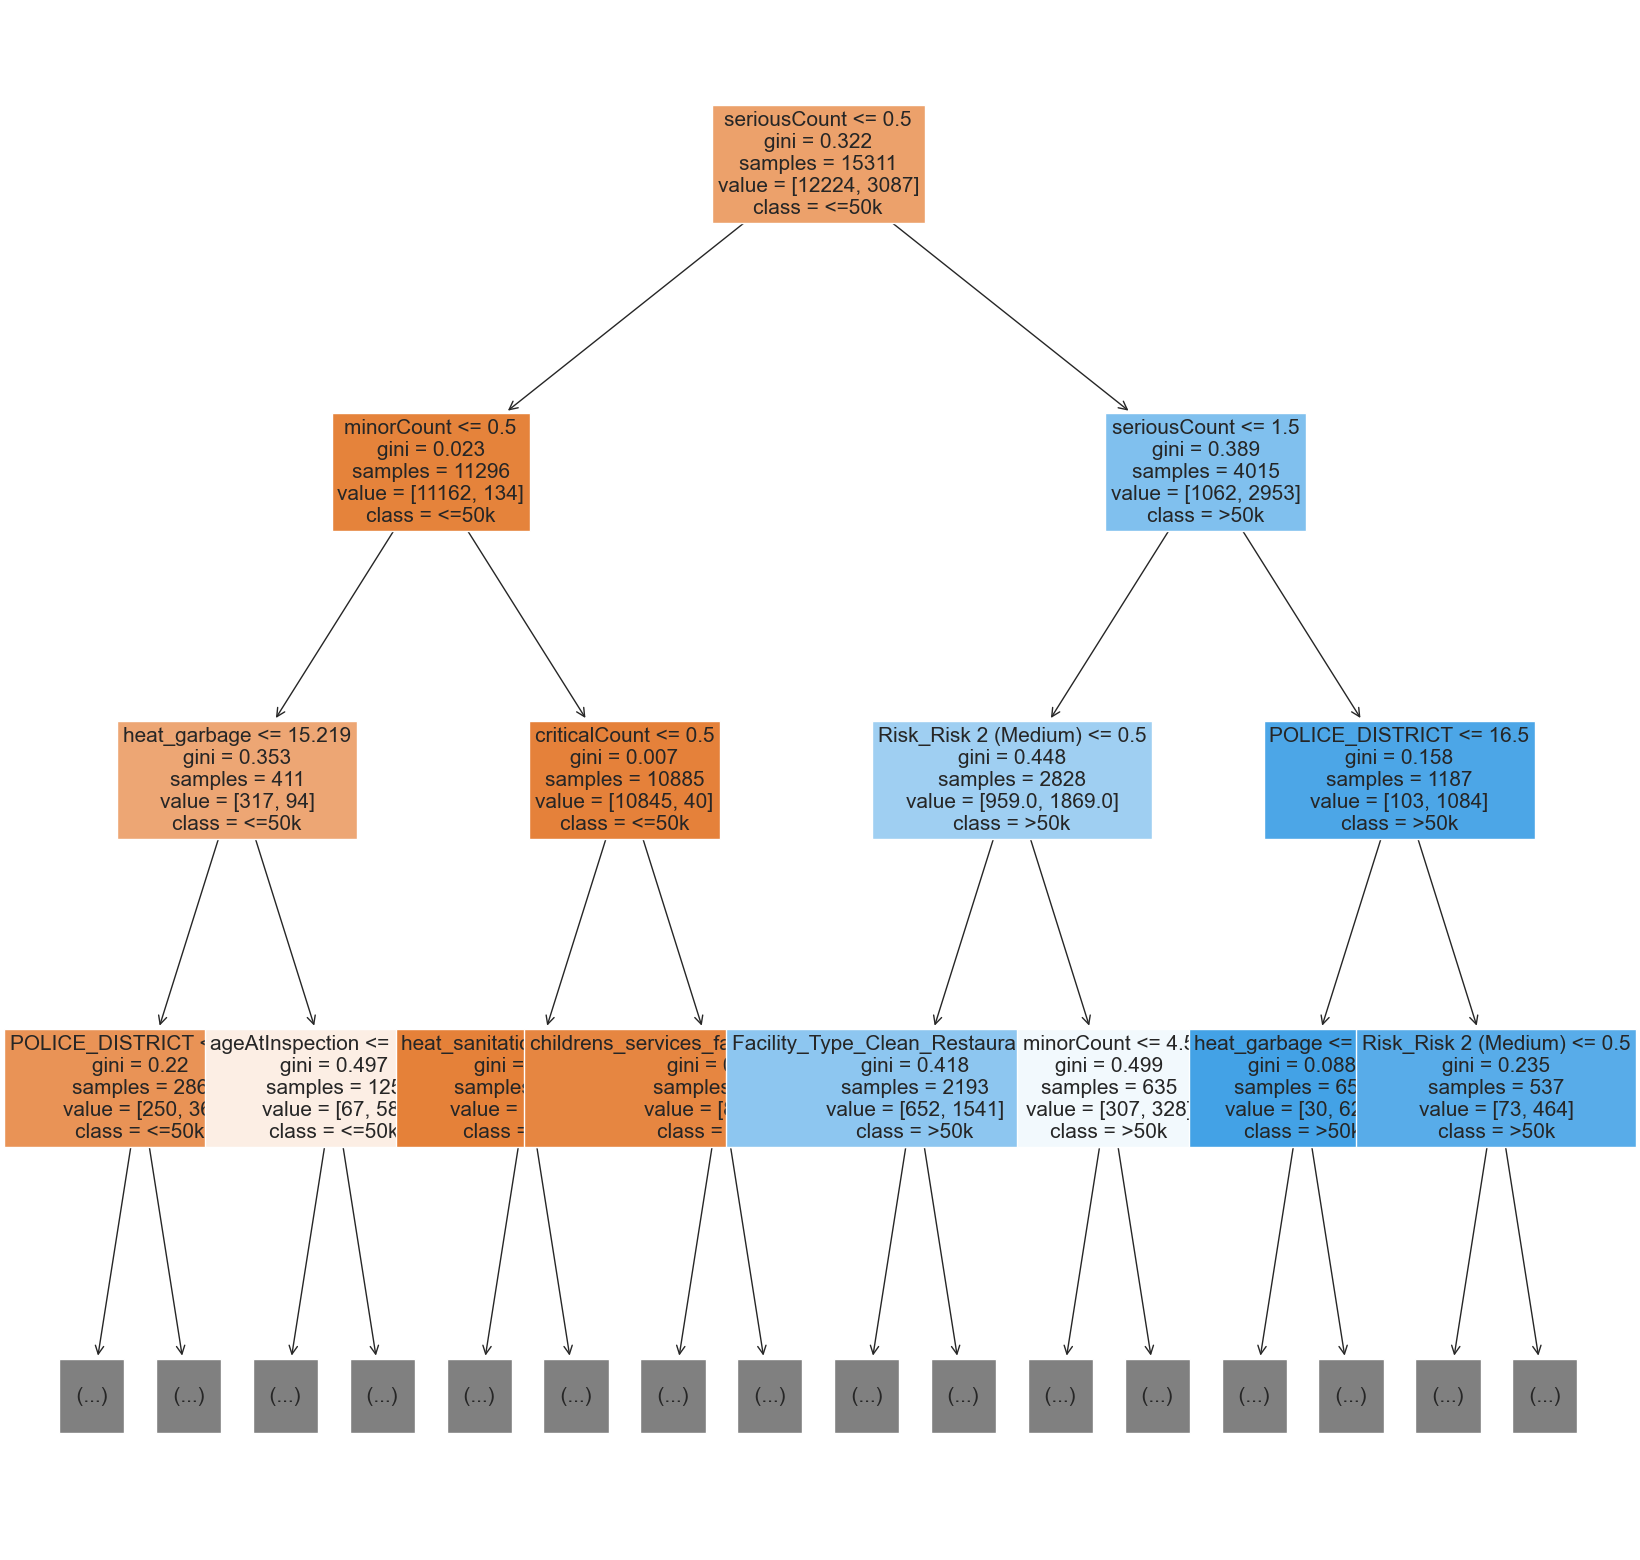

In [26]:
# fit to data
# ----------
dt_classifier.fit(X, y)

# set column names as list
column_names = X.columns.tolist()

# plot the figure
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=column_names,      # make sure its a list
                   class_names=["<=50k", ">50k"],   # specify class names
                   filled=True,                     # paint nodes to indicate majority class 
                   fontsize = 15,                   # set fontsize
                   max_depth = 3)                   # set max depth of tree to view 

In [27]:
# We can use the .max_depth attribute to check out the depth of our entire tree
dt_classifier.tree_.max_depth

28

In [28]:
# Remind ourselves how many samples in our negative class
np.count_nonzero(y==0)

12224

In [29]:
# check the samples after root node
X['seriousCount'].value_counts()

seriousCount
0    11296
1     2828
2      950
3      199
4       36
5        2
Name: count, dtype: int64

In [30]:
# Getting the most informative features
# ----------
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(dt_classifier.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
1,seriousCount,0.651
28,heat_garbage,0.039
10,ageAtInspection,0.036
24,temperatureMax,0.030
27,heat_burglary,0.029
29,heat_sanitation,0.027
25,windSpeed,0.026
2,minorCount,0.026
26,humidity,0.023
9,POLICE_DISTRICT,0.020


In [31]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [32]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [33]:
# calculate the average score across models
# ----------
scores.mean()

0.9216250168196589

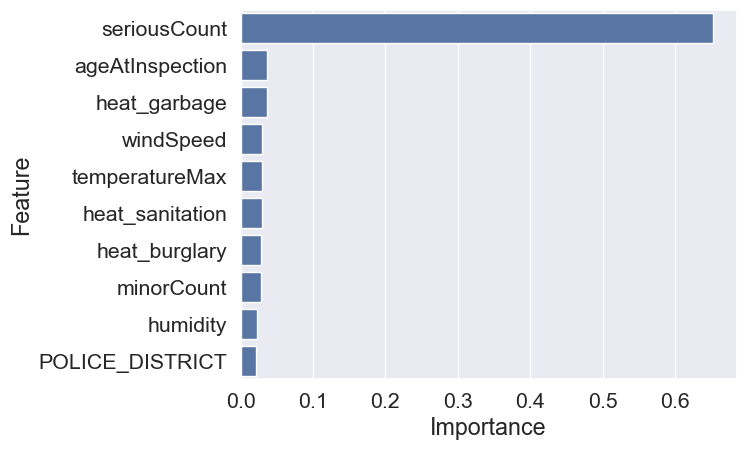

In [34]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

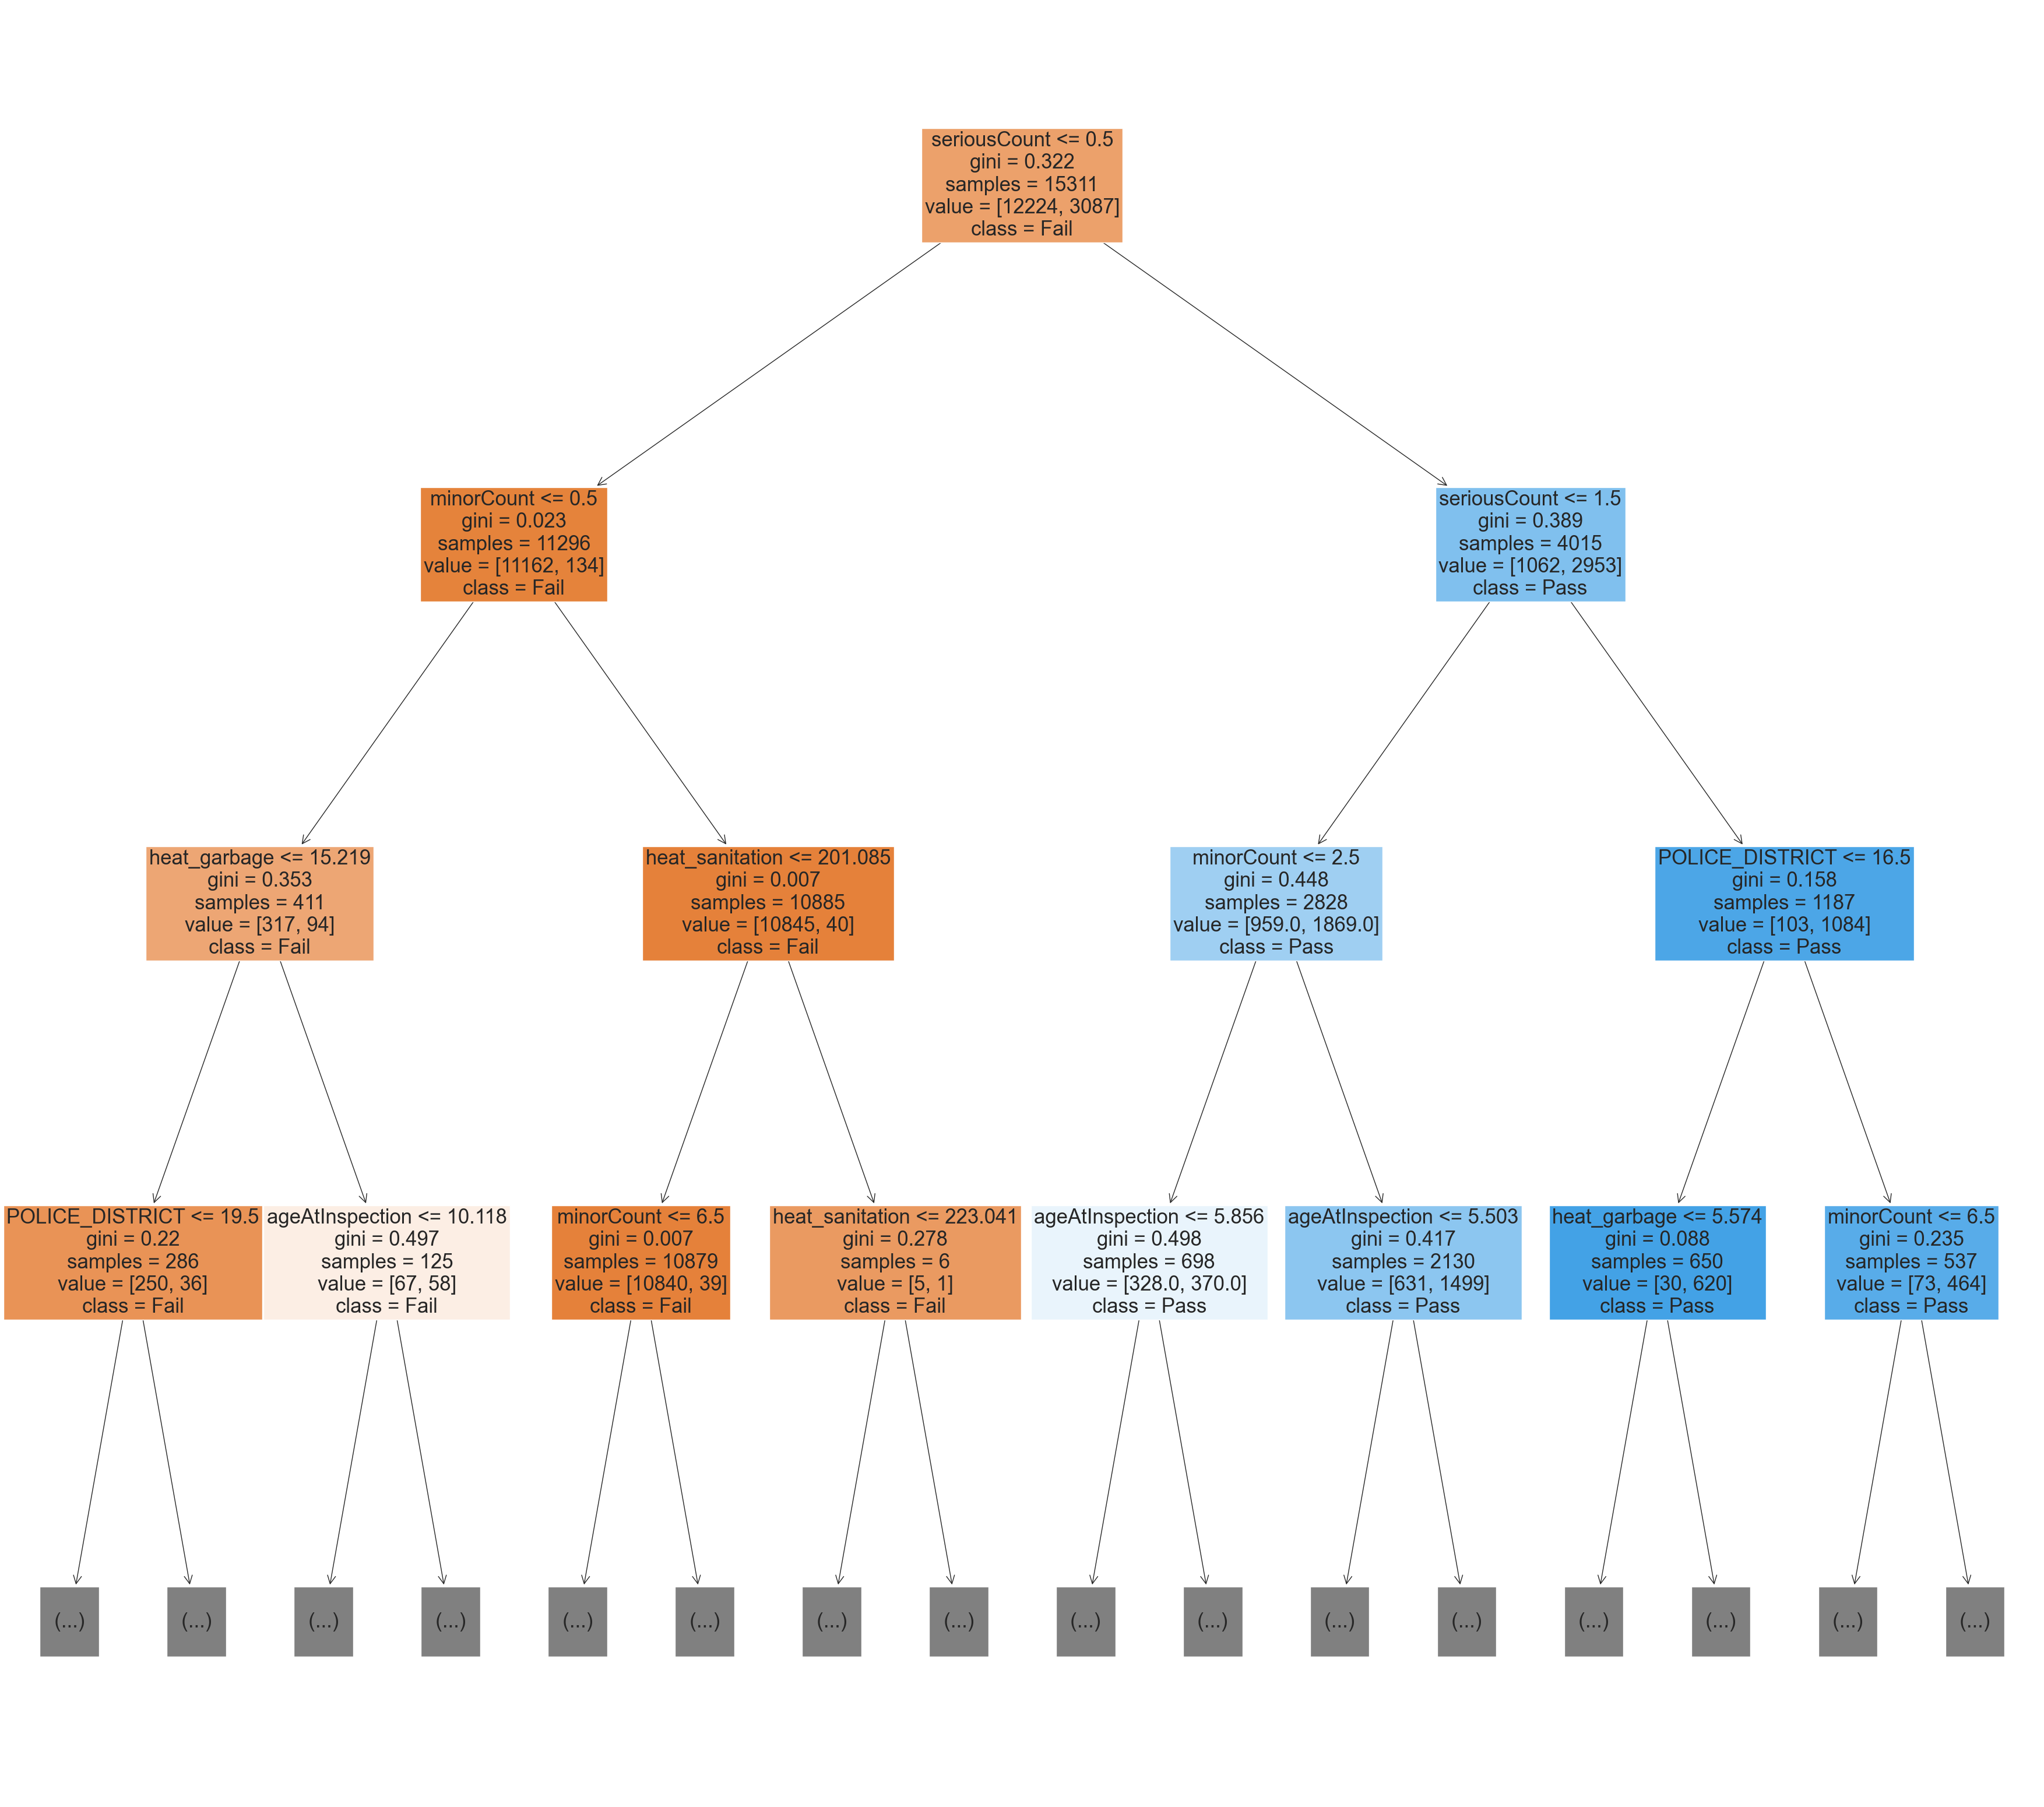

In [35]:
# refit a basic decision tree using reduced number of features 
# ----------
dt_reduced_classifier = tree.DecisionTreeClassifier(
                                 # specify parameters
                                 criterion='gini',              # or 'entropy' for information gain
                                 splitter='best',               # or 'random' for random best split
                                 max_depth=5,                   # how deep tree nodes can go
                                 min_samples_split=2,           # samples needed to split node
                                 min_samples_leaf=1,            # samples needed for a leaf
                                 min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                 max_features=None,             # number of features to look for when splitting
                                 max_leaf_nodes=None,           # max nodes
                                 min_impurity_decrease=1e-07,   # early stopping
                                 random_state = 10)             # random seed

# pull out the most features
important_features = feat_importances.nlargest(10, 'Importance')['Feature']

# create new dataset with only most important features
X_reduced = X[X.columns[X.columns.isin(important_features)]]

# fit the model on the new reduced model
dt_reduced_classifier.fit(X_reduced,
                          y)

# set column names as list
reduced_column_names = X_reduced.columns.tolist()

# plot 
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(decision_tree = dt_reduced_classifier,                          
                   feature_names=reduced_column_names,  # make sure its a list
                   class_names=["Fail", "Pass"],       # specify class names
                   filled=True,                         # paint nodes to indicate majority class 
                   fontsize = 25,                       # set fontsize
                   max_depth = 3)                       # set max depth of tree to view                      


In [36]:
# check the samples after root node
# ----------
X['seriousCount'].value_counts()

seriousCount
0    11296
1     2828
2      950
3      199
4       36
5        2
Name: count, dtype: int64

In [37]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(dt_reduced_classifier, 
                         X, 
                         y.ravel(),
                         cv=5)

# find the mean score across models
scores.mean()

0.9204492080419614

### Model 3

In [38]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

In [39]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [40]:
scores

array([0.91446294, 0.91116917, 0.91345526, 0.9288047 , 0.90529066])

In [41]:
# calculate mean score across models 
# ----------
scores.mean()

0.9146365471623236

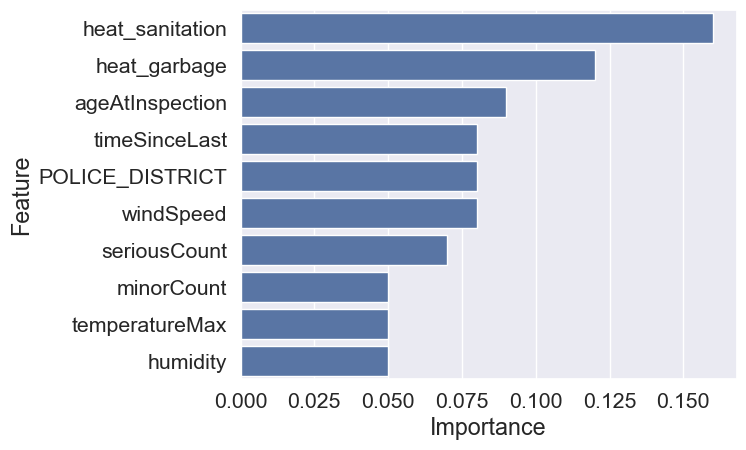

In [42]:
# fit the AdaBoost on data to get feature importance
# ----------
ada_classifier.fit(X, y.ravel())


# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

#To check accuracy, precision, recall and f1 score for Model 1

In [43]:
precision = cross_val_score(logit_model, X_train, y_train, cv=10, scoring='precision')

In [44]:
precision

array([0.79047619, 0.74883721, 0.76388889, 0.8019802 , 0.73636364,
       0.79473684, 0.81052632, 0.7804878 , 0.75119617, 0.78873239])

In [45]:
precision.mean()

0.776722565243863

In [46]:
recall = cross_val_score(logit_model, X_train, y_train, cv=10, scoring='recall')

In [47]:
recall

array([0.8972973 , 0.87027027, 0.89189189, 0.87567568, 0.87096774,
       0.81182796, 0.83243243, 0.86486486, 0.84864865, 0.90810811])

In [48]:
recall.mean()

0.867198488811392

In [49]:
F1 = cross_val_score(logit_model, X_train, y_train, cv=10, scoring='f1')
F1

array([0.84050633, 0.805     , 0.82294264, 0.8372093 , 0.79802956,
       0.80319149, 0.82133333, 0.82051282, 0.79695431, 0.84422111])

In [50]:
F1.mean()

0.818990089493758

#To check accuracy, precision, recall and f1 score for Model 2

In [51]:
precision = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='precision')

In [52]:
precision

array([0.77981651, 0.72522523, 0.78703704, 0.7815534 , 0.73394495,
       0.825     , 0.80288462, 0.77511962, 0.74770642, 0.75342466])

In [53]:
precision.mean()

0.7711712440372513

In [54]:
recall = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='recall')
recall

array([0.91891892, 0.87027027, 0.91891892, 0.87027027, 0.86021505,
       0.88709677, 0.9027027 , 0.87567568, 0.88108108, 0.89189189])

In [55]:
recall.mean()

0.8877041557686718

In [56]:
F1 = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='f1')
F1

array([0.84367246, 0.79115479, 0.8478803 , 0.82352941, 0.79207921,
       0.85492228, 0.84987277, 0.82233503, 0.808933  , 0.81683168])

In [57]:
F1.mean()

0.82512109310279

#To check accuracy, precision, recall and f1 score for Model 3

In [58]:
precision = cross_val_score(ada_classifier, X_train, y_train, cv=10, scoring='precision')
precision

array([0.81407035, 0.74874372, 0.77486911, 0.80434783, 0.78421053,
       0.80540541, 0.81621622, 0.78      , 0.77669903, 0.76649746])

In [59]:
precision.mean()

0.7871059645378917

In [60]:
recall = cross_val_score(ada_classifier, X_train, y_train, cv=10, scoring='recall')
recall

array([0.87567568, 0.80540541, 0.8       , 0.8       , 0.80107527,
       0.80107527, 0.81621622, 0.84324324, 0.86486486, 0.81621622])

In [61]:
recall.mean()

0.8223772159256029

In [62]:
F1 = cross_val_score(ada_classifier, X_train, y_train, cv=10, scoring='f1')
F1

array([0.84375   , 0.77604167, 0.78723404, 0.80216802, 0.79255319,
       0.8032345 , 0.81621622, 0.81038961, 0.81841432, 0.79057592])

In [63]:
F1.mean()

0.8040577488823978

In [64]:
accuracy = cross_val_score(logit_model, X_train, y_train, cv=10, scoring='accuracy')
accuracy

array([0.93144723, 0.91512514, 0.92274211, 0.93144723, 0.91077258,
       0.91947769, 0.92701525, 0.92374728, 0.91285403, 0.93246187])

In [65]:
accuracy.mean()

0.9227090400904648

In [66]:
accuracy = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')
accuracy

array([0.93144723, 0.90750816, 0.9336235 , 0.92491839, 0.9085963 ,
       0.9390642 , 0.93572985, 0.92374728, 0.916122  , 0.91938998])

In [67]:
accuracy.mean()

0.9240146886949677

In [68]:
accuracy = cross_val_score(ada_classifier, X_train, y_train, cv=10, scoring='accuracy')
accuracy

array([0.93471164, 0.90642002, 0.91294886, 0.92056583, 0.91512514,
       0.92056583, 0.92592593, 0.9204793 , 0.92265795, 0.91285403])

In [69]:
accuracy.mean()

0.9192254534506341

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [70]:
from sklearn.metrics import classification_report
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities and outcomes
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of "Fail"

print (y_prob)

[0.48650689 0.50353666 0.48387978 ... 0.48155174 0.50415115 0.48847269]


In [72]:
y_prob.mean()

0.48952567433317185

In [73]:
# Create a DataFrame with probabilities and predictions
audit_results = pd.DataFrame({
    'Probability_Fail': y_prob,
    'Prediction': y_pred})

# Order by probability of detecting a "Fail"
audit_results = audit_results.sort_values(by='Probability_Fail', ascending=False)

# Display first few rows of ordered results
print(audit_results.head())


      Probability_Fail  Prediction
2436          0.515857           1
3608          0.515110           1
1550          0.515089           1
4377          0.514622           1
3991          0.514481           1


In [74]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of "Fail"

In [75]:

#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
audit_results = pd.DataFrame({
    'Probability_Fail': y_prob,
    'Prediction': y_pred,})

# Order by probability of detecting a "Fail"
audit_results = audit_results.sort_values(by='Probability_Fail', ascending=True)

# Display first few rows of ordered results
print(audit_results.head())


      Probability_Fail  Prediction
2324          0.395250           0
3205          0.395979           0
4385          0.396952           0
4190          0.396991           0
2156          0.397161           0


In [76]:

#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
audit_results = pd.DataFrame({
    'Probability_Fail': y_prob,
    'Prediction': y_pred,})

# Order by probability of detecting a "Fail"
audit_results = audit_results.sort_values(by='Probability_Fail', ascending=False)

# Display first few rows of ordered results
print(audit_results.head())


      Probability_Fail  Prediction
2436          0.515857           1
3608          0.515110           1
1550          0.515089           1
4377          0.514622           1
3991          0.514481           1


In [77]:
y_pred = model.predict(X_test)
y1_prob = model.predict_proba(X_test)[:, 0]  # Probability of "Pass"

audit1_results = pd.DataFrame({
    'Probability_Pass': y1_prob,
    'Prediction': y_pred,})

# Order by probability of detecting a "Pass"
audit1_results = audit1_results.sort_values(by='Probability_Pass', ascending=True)

# Display first few rows of ordered results
print(audit1_results.head())


      Probability_Pass  Prediction
2436          0.484143           1
3608          0.484890           1
1550          0.484911           1
4377          0.485378           1
3991          0.485519           1


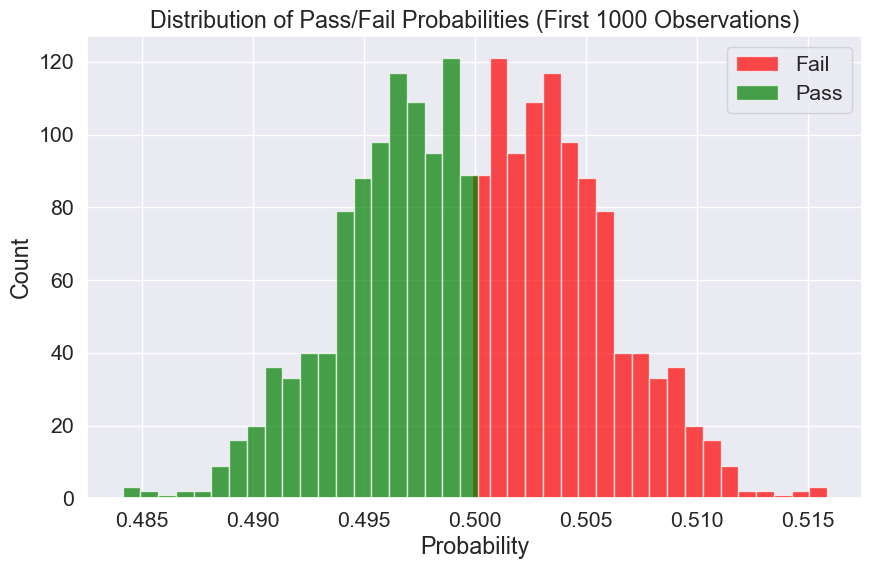

In [78]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
y_pred = model.predict(X_test)

first_1000 = audit_results.head(1000)
first1_1000 = audit1_results.head(1000)

plt.figure(figsize=(10, 6))

# Plot the histograms for Probability_Fail and Probability_Pass
plt.hist(
    first_1000['Probability_Fail'], 
    bins=20, 
    label='Fail', 
    color='red', 
    alpha=0.7
)
plt.hist(
    first1_1000['Probability_Pass'], 
    bins=20, 
    label='Pass', 
    color='green', 
    alpha=0.7
)

# Add plot labels and legend
plt.title('Distribution of Pass/Fail Probabilities (First 1000 Observations)')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend()
plt.show()


In [79]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

chicago_inspections_2011_to_2013 = pd.read_csv("C:/Users/Nalina Sofia/Downloads/Computational-Social-Science-Training-Program-main/Computational-Social-Science-Training-Program-main/Projects/Project 3/data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)




In [80]:
# Predict probabilities and outcomes

chicago_inspections_2011_to_2013 = pd.read_csv("C:/Users/Nalina Sofia/Downloads/Computational-Social-Science-Training-Program-main/Computational-Social-Science-Training-Program-main/Projects/Project 3/data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

X = chicago_inspections_2011_to_2013.drop(columns = ['Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


random_audit_sample = X.sample(n=1000, random_state=42)

print(random_audit_sample.head())


       Inspection_ID Inspection_Date                      DBA_Name  \
13857        1321994      2013-02-21              POPEYE'S CHICKEN   
5125         1102207      2012-03-22  DUNKIN DONUTS BASKIN ROBBINS   
1453          586337      2012-02-01     HAWKEYE'S BAR & GRILL INC   
6070         1134364      2012-06-27               TEA GSCHWENDNER   
16553        1361289      2013-08-23      GASLIGHT COFFEE ROASTERS   

                           AKA_Name  License             Risk  \
13857              POPEYE'S CHICKEN    30212    Risk 1 (High)   
5125   DUNKIN DONUTS BASKIN ROBBINS  1488341    Risk 1 (High)   
1453      HAWKEYE'S BAR & GRILL INC    14380    Risk 1 (High)   
6070                TEA GSCHWENDNER  1575576     Risk 3 (Low)   
16553      GASLIGHT COFFEE ROASTERS  2185009  Risk 2 (Medium)   

                     Address     City State      Zip Inspection_Type  \
13857    5248 W BELMONT AVE   CHICAGO    IL  60641.0         Canvass   
5125      6001 W ADDISON ST   CHICAGO    IL 

In [81]:
X = chicago_inspections_2011_to_2013.drop(columns = ['Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


random_audit_sample = X.sample(n=1000, random_state=42)

audit_results = pd.DataFrame({
    'Probability_Fail': y_prob,
    'Prediction': y_pred})

# Order by probability of detecting a "Fail"
audit_results = audit_results.sort_values(by='Probability_Fail')

# Display first few rows of ordered results
print(audit_results.head())


      Probability_Fail  Prediction
2324          0.395250           0
3205          0.395979           0
4385          0.396952           0
4190          0.396991           0
2156          0.397161           0


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [82]:
# data processing
# -----------

chicago_inspections_2014 = pd.read_csv("C:/Users/Nalina Sofia/Downloads/Computational-Social-Science-Training-Program-main/Computational-Social-Science-Training-Program-main/Projects/Project 3/data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

# look at the inspections data
chicago_inspections_2014.head()



,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
0,920444,2014-01-15,GALLISTEL LANGUAGE ACADEMY,GALLISTEL LANGUAGE ACADEMY,2046708,School,Risk 1 (High),10200 S AVENUE J,CHICAGO,IL,60617.0,Canvass,41.709957,-87.534223,"(41.70995714781606, -87.5342225149751)",Other,0,1,5,0,0,0,2,0.964384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,41.67,13.533333,0.726667,2.149376,7.705332,9.535848,0,Fail
1,920445,2014-02-03,SUBWAY,SUBWAY,2183563,Restaurant,Risk 1 (High),4025 E 106TH ST,CHICAGO,IL,60617.0,Canvass,41.702577,-87.525872,"(41.70257660937248, -87.52587169711877)",Restaurant,2,0,0,0,0,0,0,0.794521,0,2183563-20120829,2183563.0,375027.0,AMI SUB INC.,SUBWAY,4025 E 106TH ST 1,CHICAGO,IL,60617.0,10.0,38.0,10-38,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2183563.0,ISSUE,2012-08-29,2014-09-15,AAI,41.702577,-87.525872,2012-08-29,2018-09-15,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
2,920446,2014-02-03,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,1477112,Restaurant,Risk 2 (Medium),2027 E 95TH ST,CHICAGO,IL,60617.0,Canvass,41.722372,-87.574275,"(41.72237211196818, -87.57427469548966)",Restaurant,0,0,6,0,0,0,2,0.660274,0,1477112-20120716,2155150.0,273266.0,"A & K SHARKS, INC.",SHARKS FISH & CHICKEN,2027 E 95TH ST,CHICAGO,IL,60617.0,7.0,49.0,7-49,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1477112.0,RENEW,2012-07-16,2014-07-15,AAI,41.722372,-87.574275,2004-03-02,2018-07-15,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
3,920448,2014-03-07,P K PETRO INC.,MARATHON,1331469,Grocery Store,Risk 3 (Low),7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,Canvass,41.767798,-87.585820,"(41.76779762303839, -87.58581991823232)",Other,0,1,7,0,0,0,0,2.000000,1,1331469-20121216,2194284.0,257899.0,P K PETRO INC.,Stony Shell,7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,5.0,21.0,5-21,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1331469.0,RENEW,2012-12-16,2014-12-15,AAI,41.767798,-87.585820,2003-03-05,2018-12-15,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
4,920449,2014-03-07,"Z T DOLLAR EXCHANGE,INC",DOLLAR STORE,2189299,Grocery Store,Risk 3 (Low),2429 E 72ND ST,CHICAGO,IL,60649.0,Canvass,41.764339,-87.565371,"(41.764339216775696, -87.5653706801239)",Other,1,2,5,0,0,0,0,2.000000,1,2189299-20121009,2189299.0,249904.0,"ZT DOLLAR EXCHANGE, INC.","Z T DOLLAR EXCHANGE, INC.",2429 E 72ND ST,CHICAGO,IL,60649.0,7.0,40.0,7-40,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2189299.0,ISSUE,2012-10-09,2014-12-15,AAI,41.764339,-87.565371,2012-10-09,2018-12-15,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail


In [83]:
# list column names
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
       'LICENSE_NUMBER', 'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement

In [84]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [85]:
# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

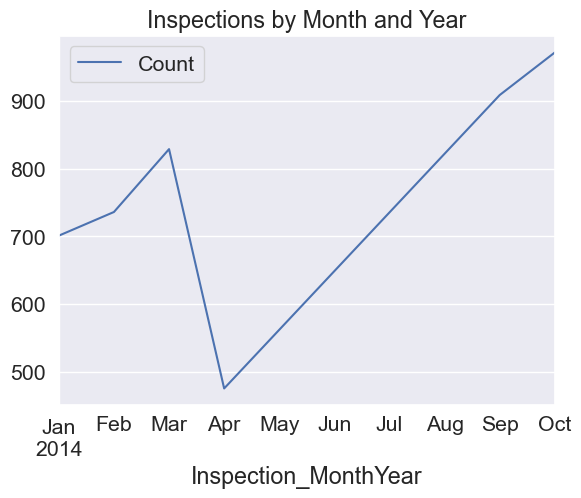

In [86]:
# visualize inspections over time
# -----------
chicago_inspections_2014['Inspection_MonthYear'] = chicago_inspections_2014['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2014.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

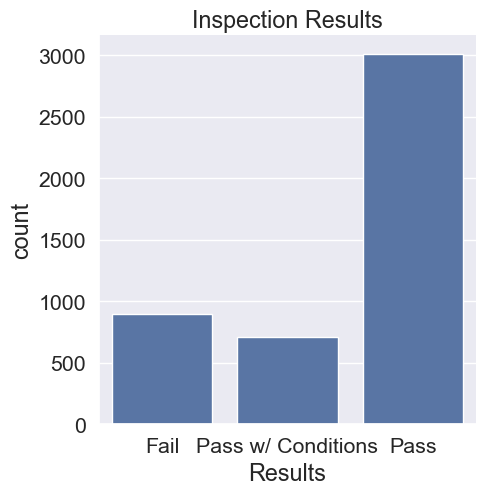

In [87]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2014,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

In [88]:
# drop datetime info
# -----------
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)


In [89]:
 for i in chicago_inspections_2014.columns: 
     if "maxDate" in i or "minDate" in i:
         chicago_inspections_2014.drop(columns={i}, inplace=True)
         print(f"dropping {i}")

In [90]:
chicago_inspections_2014=chicago_inspections_2014.dropna()

for colu in chicago_inspections_2014.columns:
   if colu not in chicago_inspections_2011_to_2013.columns:
       print(f"{colu} not in {chicago_inspections_2011_to_2013.columns=}")

In [91]:
# process target 
# -----------
y_test2014 = chicago_inspections_2014['Results']

print(len(y_test2014))

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)
print(len(y_test2014))
# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

print(len(y_test2014))

# process features
# -----------

# create feature dataset
X_test2014 = chicago_inspections_2014.drop(columns = ['Results',
                                                      'Facility_Type',
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])
print(len(chicago_inspections_2014))

# get dummies
X_test2014 = pd.get_dummies(X_test2014)

3937
3937
3937
3937


In [92]:
len(y_test2014)

3937

In [93]:
len(X_test2014)

3937

In [94]:
# view feature datset
X_test2014.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920445,SUBWAY,2,0,0,0,0,0,0,0.794521,0,4.0,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,True,False,False,True,False,True,False,False,True,False
920446,SHARKS FISH & CHICKEN,0,0,6,0,0,0,2,0.660274,0,4.0,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,False,True,False,True,False,True,False,False,False,True
920448,P K PETRO INC.,0,1,7,0,0,0,0,2.000000,1,3.0,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,False,False,True,True,True,False,False,False,False,True
920449,"Z T DOLLAR EXCHANGE,INC",1,2,5,0,0,0,0,2.000000,1,3.0,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,False,False,True,True,True,False,False,False,True,False
920450,KENNEDY FISH & CHICKEN,0,1,7,0,0,0,3,0.964384,0,3.0,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.662066,27.638311,78.175677,0,True,False,False,True,False,True,False,False,False,True


In [95]:
chicago_inspections_2014.dtypes
chicago_inspections_2014.columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Results'],
      dtype='object')

In [96]:
chicago_inspections_2011_to_2013.dtypes
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [97]:
print(chicago_inspections_2014.columns)

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Results'],
      dtype='object')


In [98]:
# Predict probabilities and outcomes
y_pred_test2014 = model.predict(X_test2014)
y_prob_test2014 = model.predict_proba(X_test2014)[:, 1]  # Probability of "Fail"


In [99]:
adaboost_model = AdaBoostClassifier(n_estimators=1000, random_state=42)
adaboost_model.fit(X_test2014, y_test2014)

# Step 3: Make Predictions
y_test2014_pred = adaboost_model.predict(X_test2014)
y_test2014_prob = model.predict_proba(X_test)[:, 1]  # Probability of "Fail"


In [100]:
y_test2014_pred

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
y_test2014_pred

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
# Accuracy Score
accuracy = accuracy_score(y_test2014, y_test2014_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.93


In [103]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test2014, y_test2014_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3153
           1       0.83      0.83      0.83       784

    accuracy                           0.93      3937
   macro avg       0.89      0.89      0.89      3937
weighted avg       0.93      0.93      0.93      3937



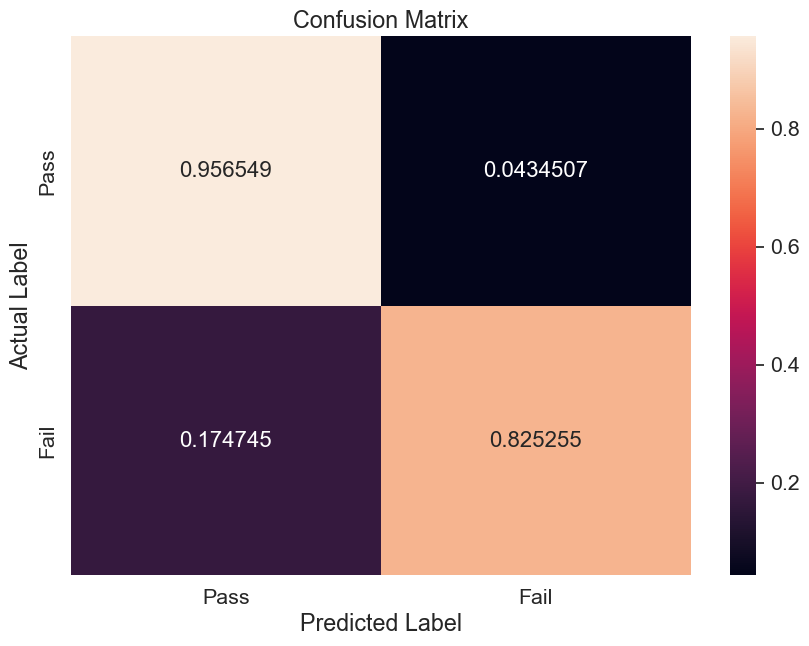

In [104]:
# evaluate
# -----------
# specify confusion matrix
cf_matrix = confusion_matrix(y_test2014, 
                             y_test2014_pred, 
                             normalize = "true")

# convert to dataframe
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))

# label dataframe 
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]

# plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

The predicted "Fail" is 82% accurate and the Predicted "Pass" is 92%.  The accuracy report also shows an accuracy of 93% and hence the model appears to predict well in the untrained data based on the training model.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**In social sciences and public policy, relying solely on accuracy as a metric in machine learning can be insufficient because these fields often deal with complex issues where factors like fairness, interpretability, and the impact on different demographic groups are crucial. Hence, accuracy alone cannot capture. 

Moreover, social science data often has imbalanced classes, where focusing on overall accuracy can mask issues where the model performs poorly on minority groups.  Public policy decisions based on machine learning models must be fair and equitable, requiring metrics to assess bias and potential discriminatory effects on specific populations.  

Therefore, metrics like precision, recall, and F1-score are needed to provide a more comprehensive understanding of a model's performance and potential societal implications.**

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**When establishments alter their behavior to evade detection based on the known algorithm, it undermines the efficacy of the system. Policymakers can address this issue through several strategies:
Regularly Update and Adapt the Algorithm:  Continuously update the algorithm to account for changing patterns in the data. Use feedback loops to identify and address strategic manipulations.  Use a combination of models or randomized models so the exact decision-making process remains unpredictable.
Randomization:  Introduce an element of randomness into the selection process.  Avoid publicizing the exact details of how the algorithm works. By keeping certain features or weights undisclosed, establishments will find it harder to game the system.
Supplemental Human Oversight:  Combine algorithmic predictions with human judgment. Auditors can review flagged cases for signs of strategic behavior.  Establish oversight committees to evaluate and refine the algorithm and audit process.
Analyze Behavioral Feedback:  Monitor how establishments respond to audits and algorithm updates. This can provide insights into potential gaming strategies.
Policymaking:  Policymakers can enact rules that penalize establishments for deliberately providing false or misleading information.  Ensure the system remains accountable and explainable to build trust while maintaining robustness against manipulation.
**